In [2]:
import pandas as pd

# Load the encoded dataframe from pickle
encoded_df = pd.read_pickle('encoded_data/encoded_data.pkl')

# Calculate the correlation between all pairs of variables
corr_matrix = encoded_df.corr()  # Corrected: using the DataFrame to calculate the correlation matrix

# Reshape the correlation matrix to a long format
corr_long = corr_matrix.unstack().reset_index()  # Unstacking and resetting index
corr_long.columns = ['Variable1', 'Variable2', 'Correlation']  # Renaming columns for clarity

# Filter and display the top correlations for 'mh_diag_professional_Yes' with other variables
top_corrs = corr_long[(corr_long['Variable1'] == 'mh_diag_professional_Yes') & (corr_long['Variable2'] != 'mh_diag_professional_Yes')]
top_corrs_sorted = top_corrs.nlargest(10, columns='Correlation')  # Sorting by correlation

# Display top correlations
print(top_corrs_sorted)

Empty DataFrame
Columns: [Variable1, Variable2, Correlation]
Index: []


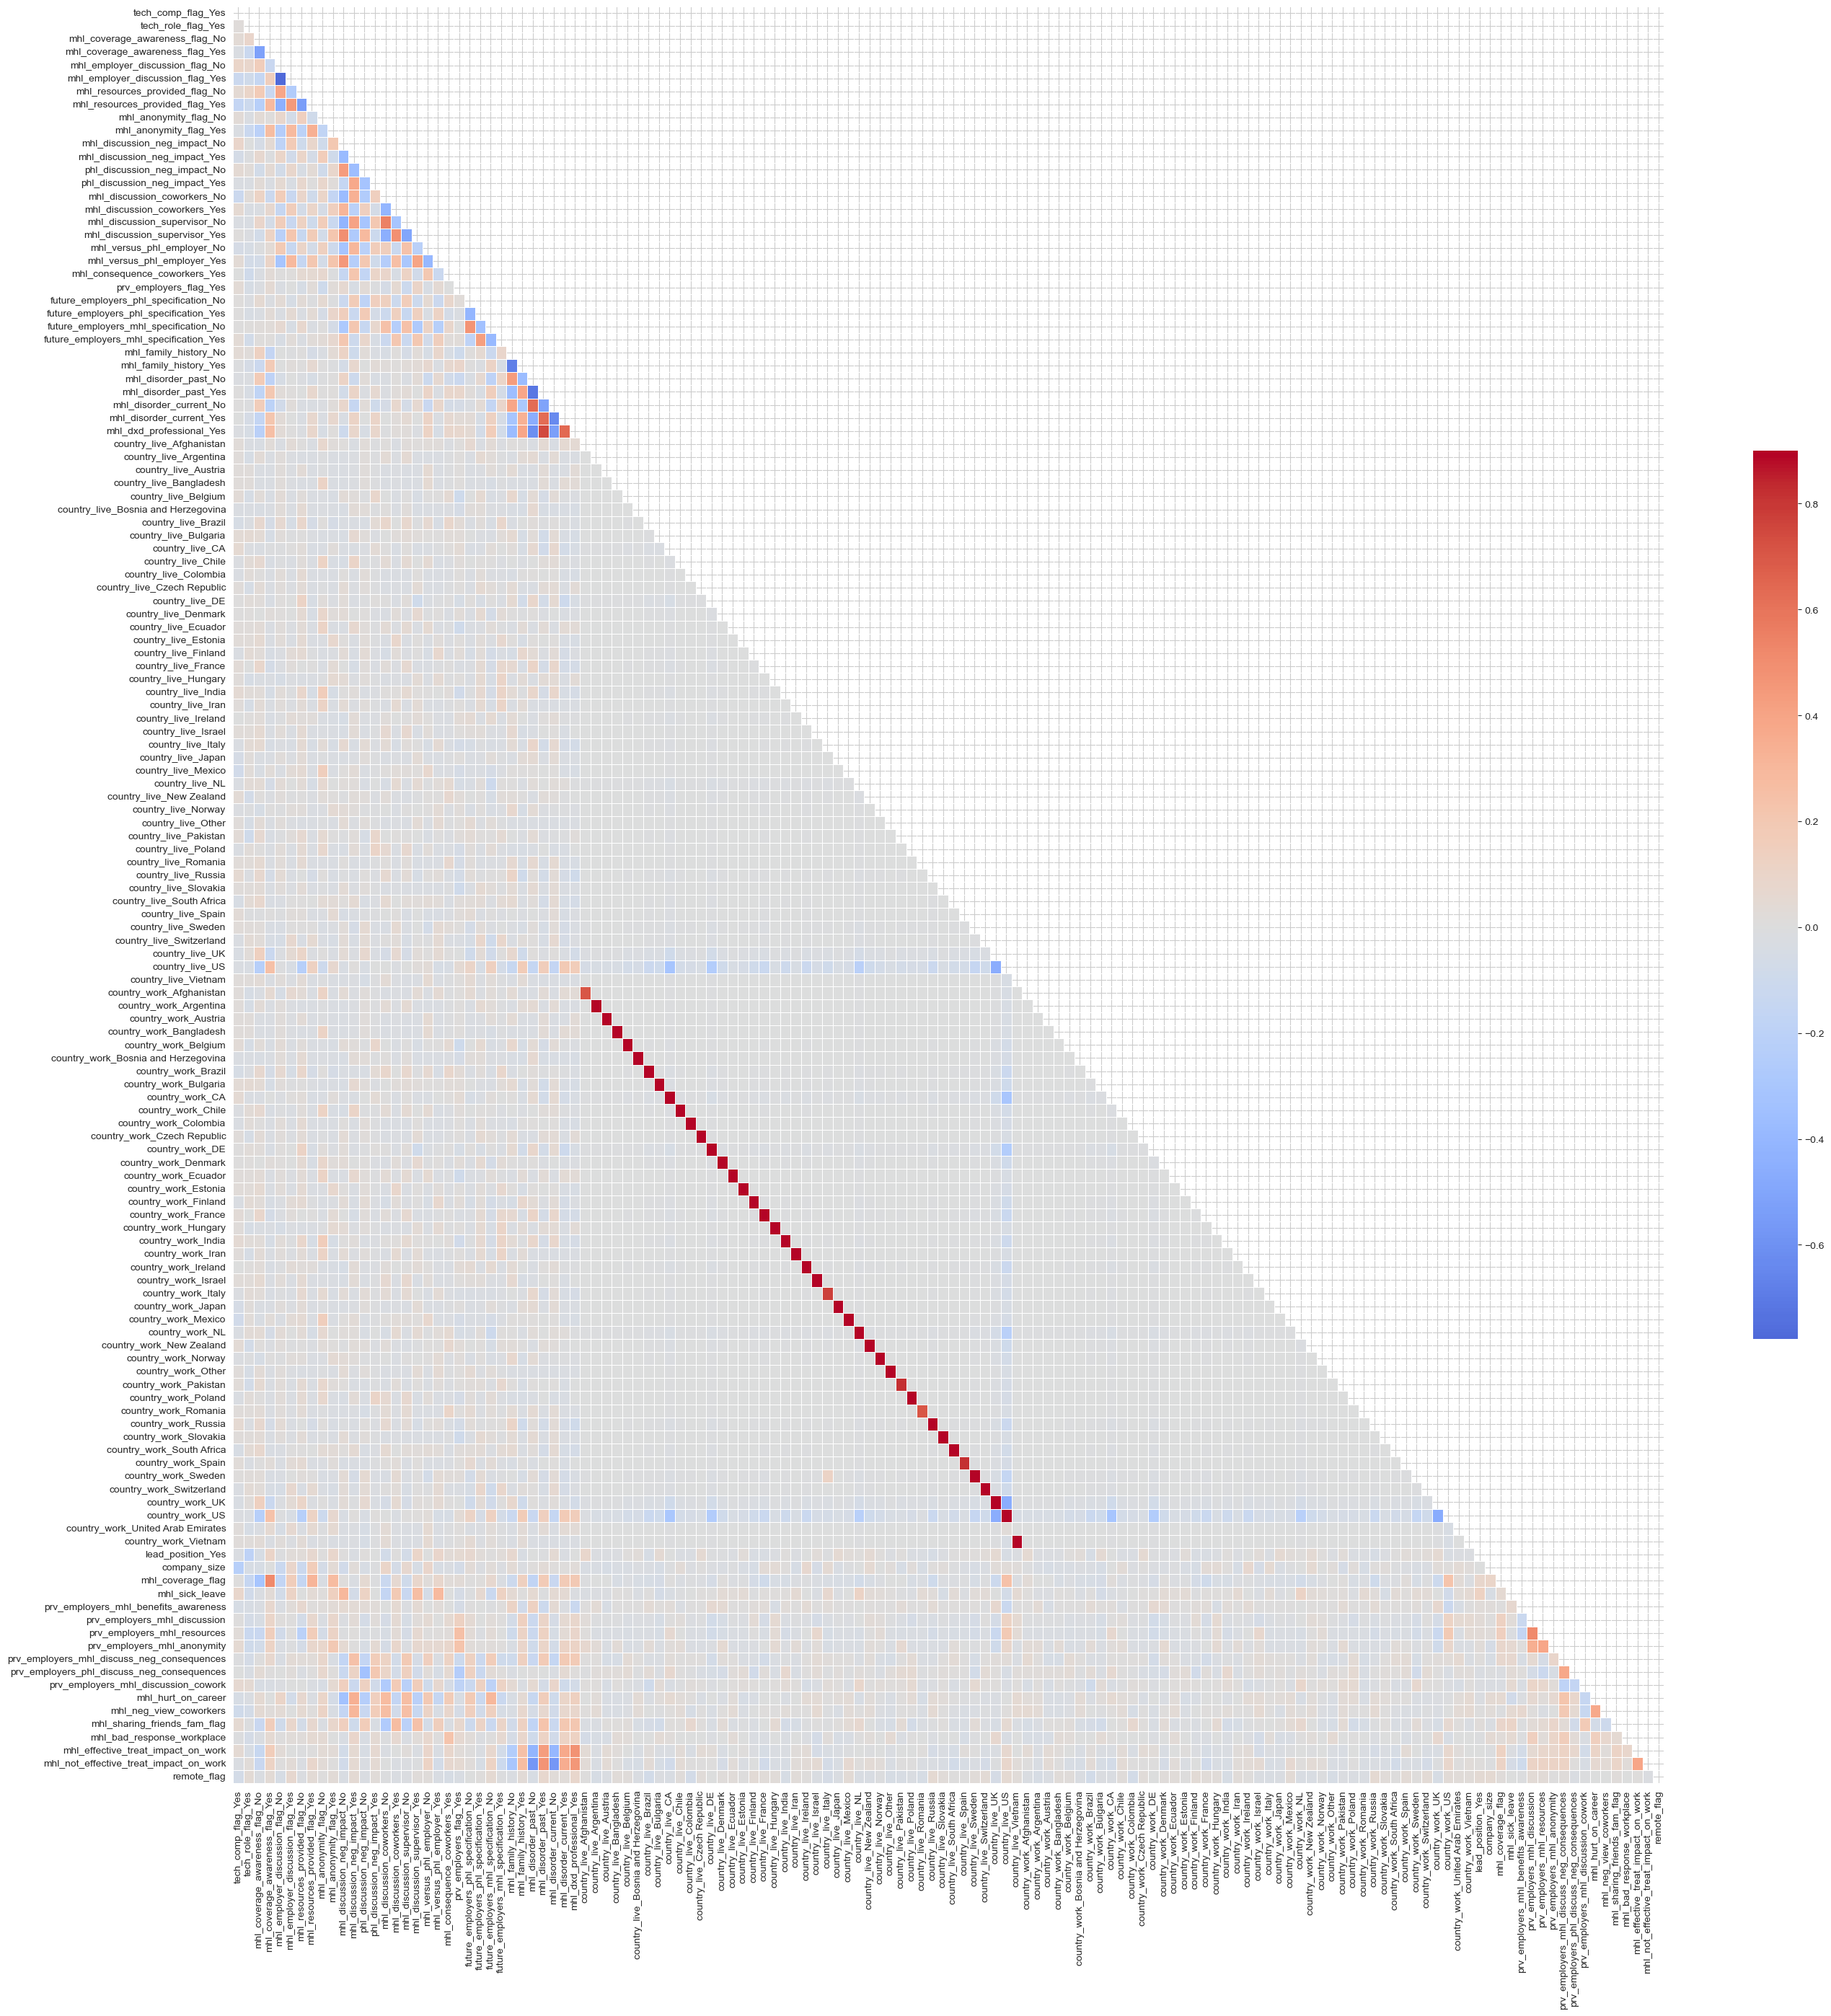

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the encoded dataframe from pickle
encoded_df = pd.read_pickle('encoded_data/encoded_data.pkl')

# Calculate the correlation between all pairs of variables using the Spearman method
corr = encoded_df.corr(method='spearman')

# Create a mask to hide the upper triangle of the correlation matrix (for better visualization)
mask_1 = np.zeros_like(corr, dtype=bool)
mask_1[np.triu_indices_from(mask_1)] = True

# Create a figure and axes for plotting
fig, ax = plt.subplots(figsize=(32, 32))

# Plotting the heatmap with the specified settings
sns.heatmap(corr, mask=mask_1, cmap="coolwarm", vmax=.9, center=0, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()
